#### The 'Example-bank-data.csv' data is based on the marketing campaign efforts of a Portuguese banking institution. 
#### The classification goal is to predict if the client will subscribe a term deposit (variable y).

#### 1. Import the relevant libraries

In [1]:
#import the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
#set the defaults for visualizations to seaborn defaults
sns.set()

#### 2. Load the  data

In [2]:
#Load the data
raw_data = pd.read_csv('Example-bank-data.csv')

#### 3. Explore the data

In [3]:
#### 3.a.Explore the rows, the columns, and the data types
raw_data.head()

,Unnamed: 0,duration,y
0,0,117,no
1,1,274,yes
2,2,167,no
3,3,686,yes
4,4,157,no


In [4]:
#### 3.b. Look at the descriptive statistics
raw_data.describe(include='all')

,Unnamed: 0,duration,y
count,518.000000,518.000000,518
unique,NaN,NaN,2
top,NaN,NaN,yes
freq,NaN,NaN,259
mean,258.500000,382.177606,NaN
std,149.677988,344.295990,NaN
min,0.000000,9.000000,NaN
25%,129.250000,155.000000,NaN
50%,258.500000,266.500000,NaN
75%,387.750000,482.750000,NaN


#### 4.Clean the data

In [5]:
#### 4.a. drop the original index column
data = raw_data.drop('Unnamed: 0',axis=1)

In [6]:
#### 4.b.Check if there is any missing data
data.isna().sum()

duration    0
y           0
dtype: int64

In [7]:
#### 4.c. Drop any missing rows
data = data.dropna(axis=0)

#### 5. Handle categorical variables

In [8]:
#### Replace the values of the categorical data with dummy variables
data['y'] = pd.get_dummies(data['y'])
#data['y'] = data['y'].map({'yes':1, 'no':0})

### Visualization

#### 6. Define the variables

In [9]:
#### 6.a. Independent variable
x1 = data['duration']

In [10]:
#### 6.b. Dependent variable
y = data['y']

#### 7. Graph the variables

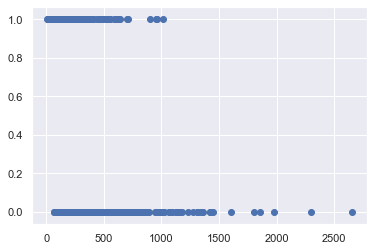

In [11]:
#### 7.a. Scatter Plot each independent variable. 
plt.scatter(x1,y)


#### 8.Evaluate the distribution
Linear, Exponential, Logistic?

#####         8.a Let's Linear Regression for example (Although it is obvious that there is not a linear relationship)

In [12]:
#### 8.a.1. Explore the independent variable
    #### 6.a. Independent variable
x1 = data['duration']
    #### 6.b. Dependent variable
y = data['y']
x1.shape

(518,)

In [13]:
#### 8.a.2. add a columns of ones to x1
x = sm.add_constant(x1)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [14]:
##### 8.a.3. Create linear regression model
reg_lin = sm.OLS(y,x)

In [15]:
#### 8.a.4. Fit the model and save in results
res_lin = reg_lin.fit()

In [16]:
#### 8.a.5. Explore the summary table
res_lin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     136.6
Date:                Mon, 30 Dec 2019   Prob (F-statistic):           3.71e-28
Time:                        11:49:43   Log-Likelihood:                -315.14
No. Observations:                 518   AIC:                             634.3
Df Residuals:                     516   BIC:                             642.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7542      0.029     25.776      0.000       0.697       0.812
duration      -0.0007   5.69e-05    -11.687      0.000      -0.001      -0.001
==============================================================================
Omnibus:                     4327.449   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.137
Skew:                          -0.187   Prob(JB):                     4.77e-12
Kurtosis:                       1.492   Cond. No.                         769.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
#### 8.a.6. Create a predictor function of y
yhat_lin = res_lin.predict(x)

(-1.1113479423855916, 1.1149942833912196)

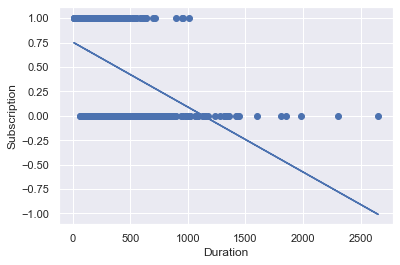

In [18]:
#### 8.a.7. Plot both the yhat and the original data for comparison: (notice linear model is not a good choice)
plt.scatter(x1,y)
plt.plot(x1,yhat_lin)
plt.ylabel('Subscription')
plt.xlabel('Duration')
plt.ylim()

#####         8.b Let's Logistic Regression this time:

In [19]:
#### 8.b.1. define the variables
    #### 6.a. Independent variable
x1 = data['duration']
    #### 6.b. Dependent variable
y = data['y']

In [20]:
#### 8.b.2. Add a column of ones to x1 
x = sm.add_constant(x1)

In [21]:
#### 8.b.3 Create logistic regression
reg_log = sm.Logit(y,x)
res_log = reg_log.fit()
res_log.summary()

Optimization terminated successfully.
         Current function value: inf
         Iterations 7


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Mon, 30 Dec 2019   Pseudo R-squ.:                     inf
Time:                        11:49:45   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7001      0.192      8.863      0.000       1.324       2.076
duration      -0.0051      0.001     -9.159      0.000      -0.006      -0.004
==============================================================================
"""

In [22]:
#### 8.b.4. Create a logistic predictor function and 
yhat_log = res_log.predict(x)

In [23]:
#### 8.b.5. SORT the dependent and independent variables
yhat_log = np.sort(yhat_log)
x1 = np.sort(x1)

Text(0, 0.5, 'Subscription')

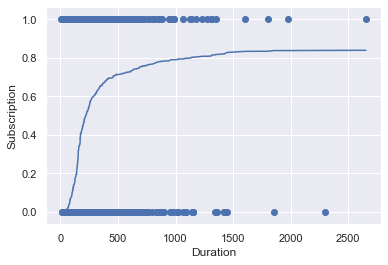

In [24]:
#### 8.b.6. Plot the regression and the original data
plt.scatter(x1,y)
plt.plot(x1, yhat_log)
plt.xlabel('Duration')
plt.ylabel('Subscription')

# Interpret the results